# FINC612 ASSIGNMENT 2

# PART 1: TIME SERIES ANALYSIS

OBJECTIVE:

To develop a time series model that can accurately predict the price of Bitcoin Futures (CME-BTC=F) based on the historical prices of Gold (COMEX-GC=F) and Ethereum (CCC-ETH-USD) from January 2020 to July 2024.

PROBLEM STATEMENT:

Nakamura Hitoshi is interested in investing in Bitcoin and wants to understand the factors that influence its price. By analysing the relationship between Bitcoin Futures and the prices of Gold and Ethereum, we aim to create a predictive model that can assist Nakamura in making informed investment decisions.

KEY QUESTIONS:

•	Is there a significant correlation between Bitcoin Futures prices and the prices of Gold and Ethereum?

•	Can a time series model effectively predict Bitcoin Futures prices using Gold and Ethereum as predictors?

•	What is the optimal model structure for achieving the best predictive performance?


# **Contents**
* [1. Install Packages](#1)
* [2. Data Preparation](#2)
* [3. Time Series Preliminary Analysis](#3)
    * [3.1. Differencing](#3.1)    
    * [3.2. Seasonality](#3.2)
* [4. Fitting Model](#4)
    * [4.1. ARIMA](#4.1)
    * [4.2. SARIMA](#4.2)
    * [4.3. SARIMAX](#4.3)
    * [4.4. ARIMAX](#4.4)
* [5.Conclusion](#5)
* [6.References](#6)   

<a id='1'></a>
# 1. Install Pakages

In [ ]:
!pip install statsmodels==0.14.0

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id='2'></a>
# 2. Data Preparation

In [ ]:
tickers = ["BTC=F"]

In [ ]:
fc = yf.download(tickers, start="2020-01-01", end ="2024-07-31")

[*********************100%***********************]  1 of 1 completed


In [ ]:
fc.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,7225.0,7225.0,6900.0,6940.0,6940.0,4754
2020-01-03,6960.0,7500.0,6860.0,7385.0,7385.0,8657
2020-01-06,7435.0,7685.0,7385.0,7615.0,7615.0,6104
2020-01-07,7725.0,8300.0,7725.0,8280.0,8280.0,11526
2020-01-08,8165.0,8595.0,7915.0,8110.0,8110.0,16332


In [ ]:
# Get adj close
fc = fc['Adj Close']

In [ ]:
fc.head(5)

,Adj Close
Date,
2020-01-02,6940.0
2020-01-03,7385.0
2020-01-06,7615.0
2020-01-07,8280.0
2020-01-08,8110.0


In [ ]:
data_length = len(fc)
data_length

1152

<a id='3'></a>
# 3. Time Series Preliminary Analysis

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Augmented Dickey-Fuller test
result = adfuller(fc)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -1.17897396877388
p-value: 0.6825745583573337
Critical Values: {'1%': -3.436079050499444, '5%': -2.8640697479399972, '10%': -2.5681169015905425}


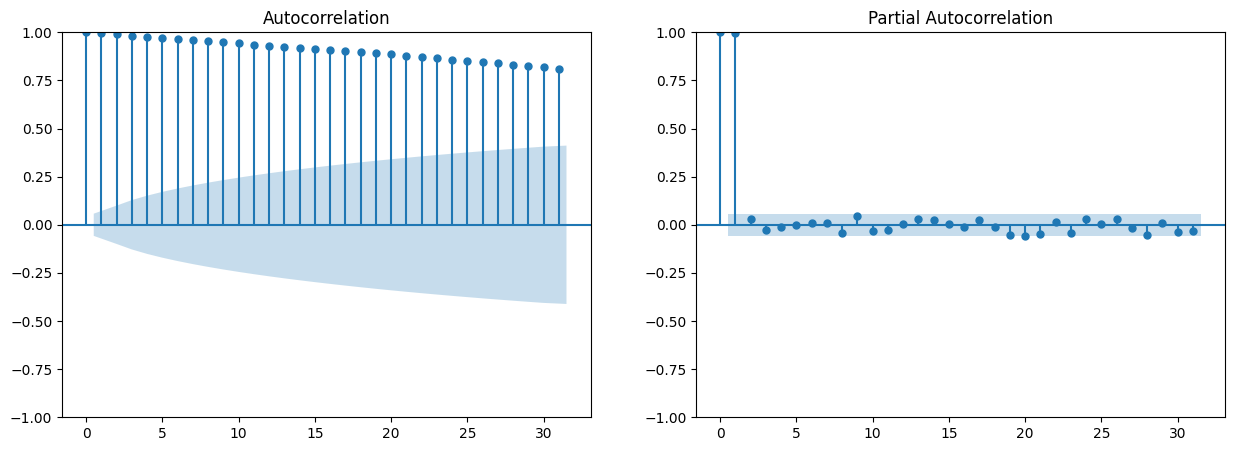

In [ ]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(fc, ax=axes[0])
plot_pacf(fc, ax=axes[1])

plt.show()

<a id='3.1'></a>
# 3.1. Differencing

As the Time Series Data is not Stationary (p-value > 0.05), We are making it stationary by Differencing.


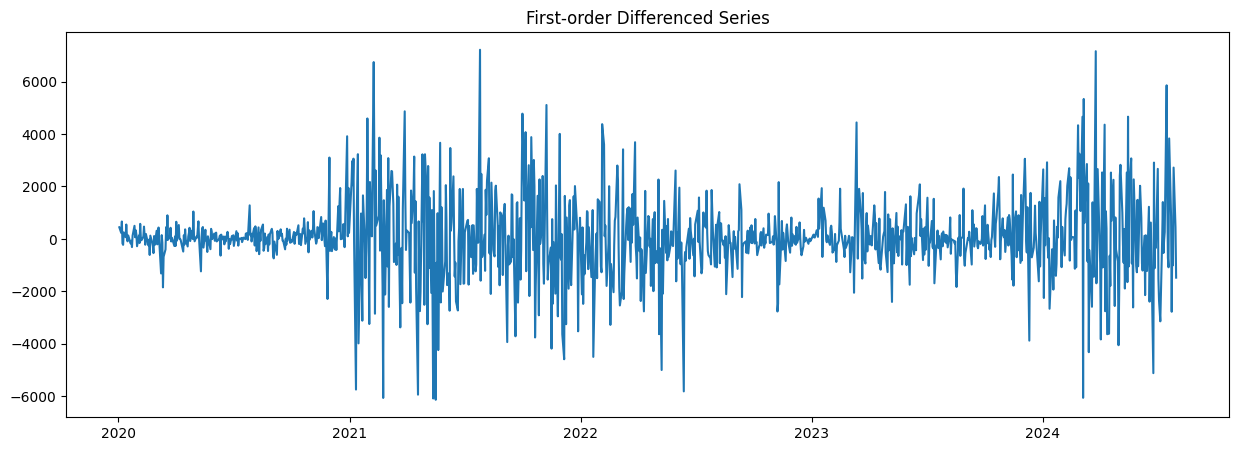

ADF Statistic (Differenced): -12.357720961062464
p-value (Differenced): 5.636898965897338e-23
Critical Values (Differenced): {'1%': -3.436079050499444, '5%': -2.8640697479399972, '10%': -2.5681169015905425}


In [ ]:
# As the Time Series Data is not Stationary (p-value>0.05), Making it stationary by Differencing

# First-order differencing
fc_diff = fc.diff().dropna()

# Plotting the differenced series
plt.figure(figsize=(15, 5))
plt.plot(fc_diff)
plt.title('First-order Differenced Series')
plt.show()

# Augmented Dickey-Fuller test on differenced series
result_diff = adfuller(fc_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):', result_diff[4])


p-value (Differenced) is less than 0.05 now. Hence, Stationary.

<a id='3.2'></a>
#3.2. Seasonality

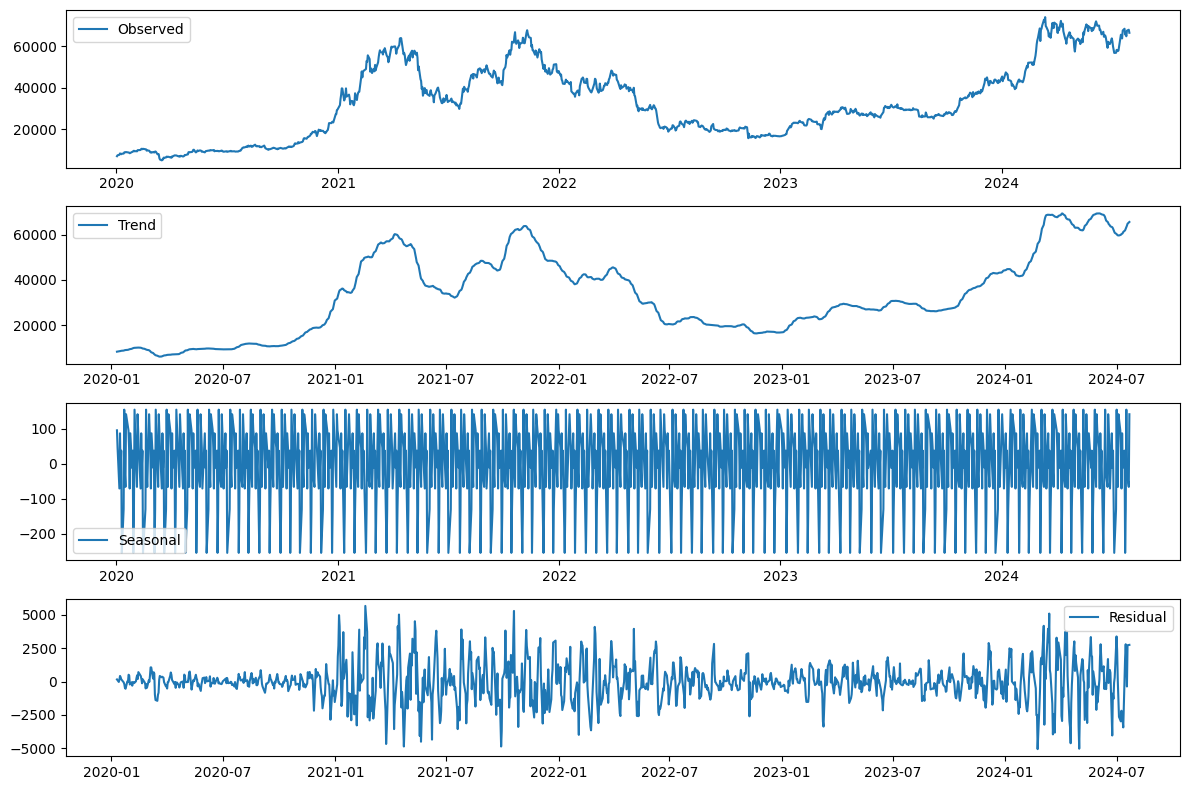

In [ ]:
decomposition = seasonal_decompose(fc, model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

<a id='4'></a>
# 4. FITTING MODEL

<a id='4.1'></a>
# 4.1. ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(fc.values, order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1152
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -10061.373
Date:                Fri, 27 Sep 2024   AIC                          20128.746
Time:                        21:08:52   BIC                          20143.894
Sample:                             0   HQIC                         20134.464
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.293e+04   1.37e+04      2.407      0.016    6120.560    5.97e+04
ar.L1          0.9976      0.002    443.186      0.000       0.993       1.002
sigma2      2.246e+06   5.64e+04     39.853      0.0

In [ ]:
model = ARIMA(fc.values, order=(10, 0, 7))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1152
Model:                ARIMA(10, 0, 7)   Log Likelihood              -10037.788
Date:                Fri, 27 Sep 2024   AIC                          20113.577
Time:                        21:09:09   BIC                          20209.512
Sample:                             0   HQIC                         20149.788
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.293e+04   8083.695      4.074      0.000    1.71e+04    4.88e+04
ar.L1          1.6224      0.193      8.399      0.000       1.244       2.001
ar.L2         -1.1182      0.248     -4.501      0.0

In [ ]:
model = ARIMA(fc.values, order=(0, 0, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1152
Model:                          ARIMA   Log Likelihood              -16402.401
Date:                Fri, 27 Sep 2024   AIC                          32808.801
Time:                        21:09:16   BIC                          32818.900
Sample:                             0   HQIC                         32812.613
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.293e+04   6.09e+05      0.054      0.957   -1.16e+06    1.23e+06
sigma2      3.703e+11   2.18e+10     16.956      0.000    3.28e+11    4.13e+11
Ljung-Box (L1) (Q):                1141.37   Jarque-

**Prediction with ARIMA**

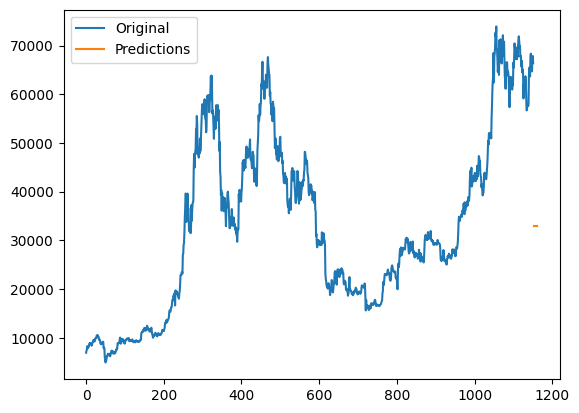

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Predict the next 10 steps
predictions = model_fit.predict(start=len(fc), end=len(fc) + 9)

# Plot the original data and predictions
plt.plot(fc.values, label='Original')
plt.plot(range(len(fc), len(fc) + 10), predictions, label='Predictions')
plt.legend()
plt.show()

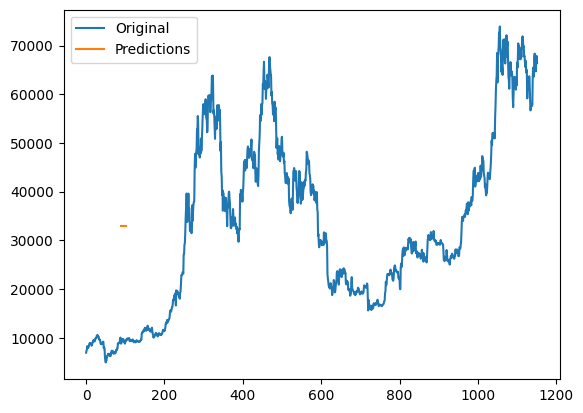

In [ ]:
# Predict for steps 90 to 103
predictions = model_fit.predict(start=90, end=103)

# Plot the original data and predictions
plt.plot(fc.values, label='Original')
plt.plot(range(90, 104), predictions, label='Predictions')
plt.legend()
plt.show()

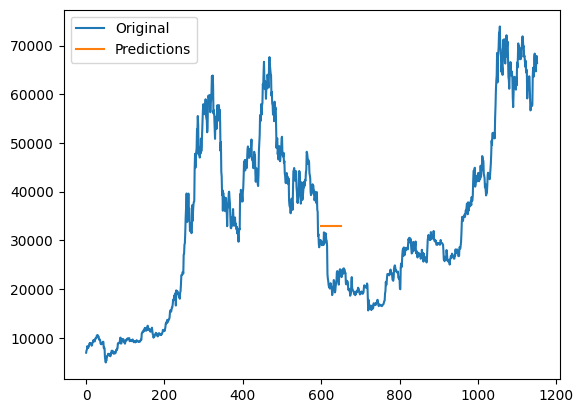

In [ ]:
# Predict for steps 600 to 650
predictions = model_fit.predict(start=600, end=650)

# Plot the original data and predictions
plt.plot(fc.values, label='Original')
plt.plot(range(600, 651), predictions, label='Predictions')
plt.legend()
plt.show()

MES: 95706285.0579
RMSE: 9782.9589
MAE: 8792.5658
R-squared: -4.2023


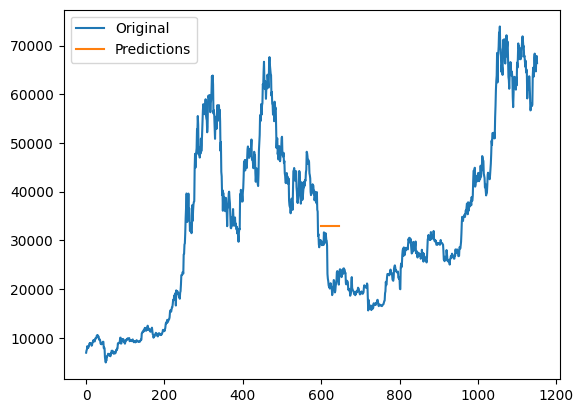

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict for steps 600 to 646
# changed the end value to ensure that the prediction output is the same lenght
predictions = model_fit.predict(start=600, end=646)

# Get the actual values for steps 600 to 647
y_true = fc.values[600:647] #changed the end value to match the lenght of the prediction

# Calculate MES
mse = mean_squared_error(y_true, predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_true, predictions)

# Calculate R-squared
r2 = r2_score(y_true, predictions)

# Print the results
print(f"MES: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot the original data and predictions
plt.plot(fc.values, label='Original')
plt.plot(range(600, 647), predictions, label='Predictions') # changed the end value to match the new range
plt.legend()
plt.show()


<a id='4.2'></a>
# 4.2. SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 1581513.4910
RMSE: 1257.5824
MAE: 848.6602
R-squared: 0.9140


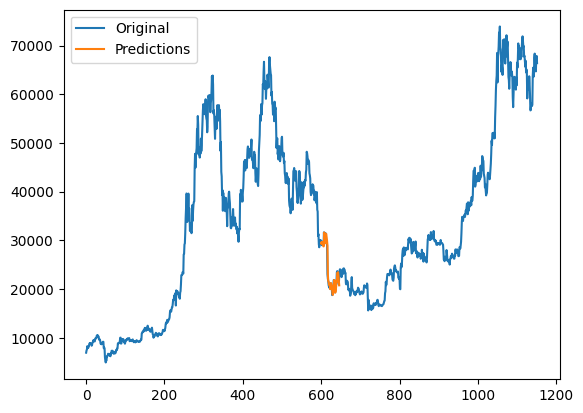

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fit the SARIMAX model (example order and seasonal_order)
model = SARIMAX(fc.values, order=(10, 0, 7), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Predict for steps 600 to 646
predictions = model_fit.predict(start=600, end=646)

# Get the actual values for steps 600 to 646
y_true = fc.values[600:647]

# Calculate MSE
mse = mean_squared_error(y_true, predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_true, predictions)

# Calculate R-squared
r2 = r2_score(y_true, predictions)

# Print the results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot the original data and predictions
plt.plot(fc.values, label='Original')
plt.plot(range(600, 647), predictions, label='Predictions')
plt.legend()
plt.show()

# ARIMAX - SARIMAX

<a id='4.3'></a>
# 4.3. SARIMAX

[*********************100%***********************]  3 of 3 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn

                               SARIMAX Results                                
Dep. Variable:                  BTC=F   No. Observations:                 1151
Model:              SARIMAX(10, 0, 7)   Log Likelihood               -9684.603
Date:                Fri, 27 Sep 2024   AIC                          19409.206
Time:                        21:11:22   BIC                          19510.174
Sample:                             0   HQIC                         19447.318
                               - 1151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GC=F           3.9661      2.219      1.787      0.074      -0.383       8.316
ETH-USD        9.3172      0.210     44.337      0.000       8.905       9.729
ar.L1         -0.5571     11.340     -0.049      0.9

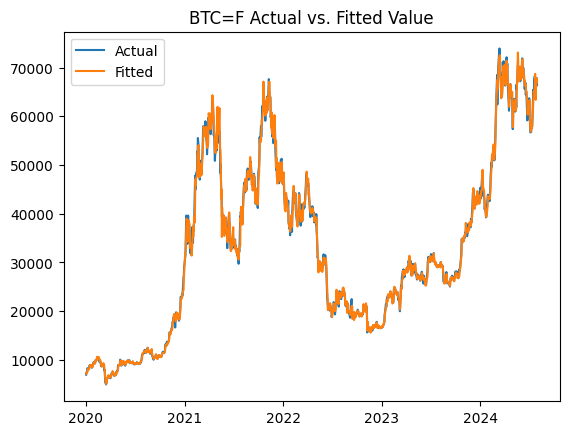

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Download data from Yahoo Finance
data = yf.download(["GC=F", "ETH-USD", "BTC=F"], start='2020-01-01', end='2024-07-31')

# Extract adj closing prices
df = data['Adj Close']

# Ensure there are no missing values
df = df.dropna()

# Create the SARIMAX model
# and including GC=F and ETH-USD as exogenous variables
model = SARIMAX(endog=df['BTC=F'], exog=df[['GC=F', 'ETH-USD']], order=(10, 0, 7))

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Get the coefficients for the exogenous variables
gc_f_coef = model_fit.params['GC=F']
eth_usd_coef = model_fit.params['ETH-USD']

# Print the coefficients
print(f"GC=F coefficient: {gc_f_coef}")
print(f"ETH-USD coefficient: {eth_usd_coef}")

# Plot the actual and fitted values for BTC=F
plt.plot(df['BTC=F'], label='Actual')
plt.plot(model_fit.fittedvalues, label='Fitted')
plt.legend()
plt.title('BTC=F Actual vs. Fitted Value')
plt.show()


Coefficient of Ethereum is higher than that of Gold. So, Ethereum will influence the Bitcoin Futures more than Gold.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error (MSE): 1165076.4805
Root Mean Squared Error (RMSE): 1079.3871
Mean Absolute Error (MAE): 696.0645
R-squared (R2): 0.9964


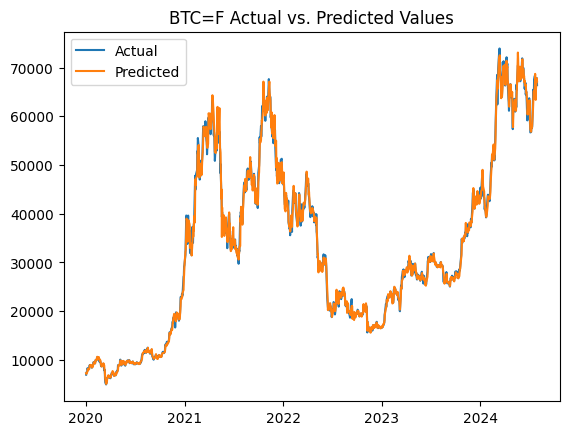

In [ ]:
# Get predictions
predictions = model_fit.get_prediction()
predicted_mean = predictions.predicted_mean

# Evaluate the model
mse = mean_squared_error(df['BTC=F'], predicted_mean)
rmse = mean_squared_error(df['BTC=F'], predicted_mean, squared=False)
mae = mean_absolute_error(df['BTC=F'], predicted_mean)
r2 = r2_score(df['BTC=F'], predicted_mean)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Plot the actual and predicted values
plt.plot(df['BTC=F'], label='Actual')
plt.plot(predicted_mean, label='Predicted')
plt.legend()
plt.title('BTC=F Actual vs. Predicted Values')
plt.show()

<a id='4.4'></a>
# 4.4. ARIMAX

[*********************100%***********************]  3 of 3 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting para

                               SARIMAX Results                                
Dep. Variable:                  BTC=F   No. Observations:                 1151
Model:                ARIMA(10, 0, 7)   Log Likelihood               -9730.558
Date:                Fri, 27 Sep 2024   AIC                          19503.117
Time:                        21:11:50   BIC                          19609.133
Sample:                             0   HQIC                         19543.134
                               - 1151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.889e+04   3.36e+04     -0.860      0.390   -9.48e+04     3.7e+04
GC=F          18.4568      1.875      9.843      0.000      14.782      22.132
ETH-USD        9.2161      0.215     42.947      0.0

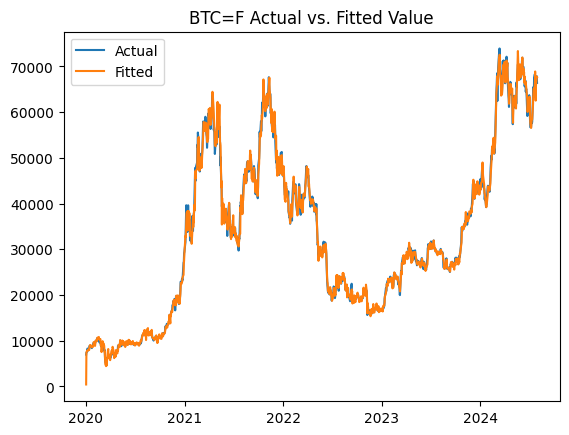

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Download data from Yahoo Finance
data = yf.download(["GC=F", "ETH-USD", "BTC=F"], start='2020-01-01', end='2024-07-31')

# Extract adj closing prices
df = data['Adj Close']

# Ensure there are no missing values
df = df.dropna()

# Create the ARIMAX model
# and including GC=F and ETH-USD as exogenous variables
model = ARIMA(endog=df['BTC=F'], exog=df[['GC=F', 'ETH-USD']], order=(10, 0, 7))

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Get the coefficients for the exogenous variables
gc_f_coef = model_fit.params['GC=F']
eth_usd_coef = model_fit.params['ETH-USD']

# Print the coefficients
print(f"GC=F coefficient: {gc_f_coef:.4f}")
print(f"ETH-USD coefficient: {eth_usd_coef:.4f}")

# Plot the actual and fitted values for BTC=F
plt.plot(df['BTC=F'], label='Actual')
plt.plot(model_fit.fittedvalues, label='Fitted')
plt.legend()
plt.title('BTC=F Actual vs. Fitted Value')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error (MSE): 1307517.7163
Root Mean Squared Error (RMSE): 1143.4674
Mean Absolute Error (MAE): 768.2821
R-squared (R2): 0.9959


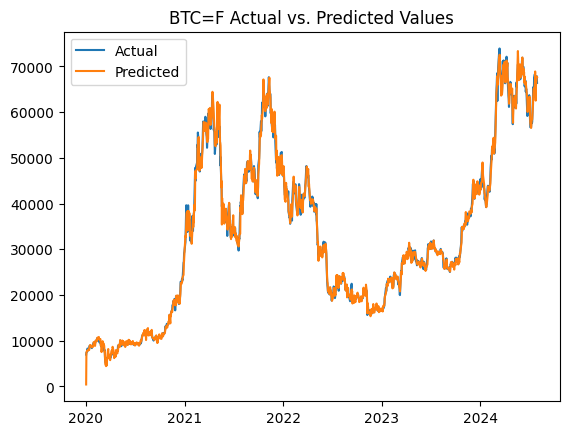

In [ ]:
# Get predictions
predictions = model_fit.get_prediction()
predicted_mean = predictions.predicted_mean

# Evaluate the model
mse = mean_squared_error(df['BTC=F'], predicted_mean)
rmse = mean_squared_error(df['BTC=F'], predicted_mean, squared=False)
mae = mean_absolute_error(df['BTC=F'], predicted_mean)
r2 = r2_score(df['BTC=F'], predicted_mean)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Plot the actual and predicted values
plt.plot(df['BTC=F'], label='Actual')
plt.plot(predicted_mean, label='Predicted')
plt.legend()
plt.title('BTC=F Actual vs. Predicted Values')
plt.show()

<a id='5.0'></a>
#5.0.  CONCLUSION

Based on the analysis conducted, we have reached the following conclusions:


1.	Correlation Analysis and Influence of Ethereum & Gold:
There is a significant correlation between Bitcoin Futures prices and the prices of Ethereum and Gold. The coefficient of Ethereum is higher than that of Gold, indicating that Ethereum has a greater influence on Bitcoin Futures prices. Ethereum often shows a positive correlation with Bitcoin, meaning their prices tend to move in the same direction. Ethereum’s influence on Bitcoin can be significant due to its role in the broader cryptocurrency ecosystem. The relationship between Gold and Bitcoin is more complex. Gold’s influence on Bitcoin is generally less direct compared to Ethereum. This indicates that fluctuations in the prices of these can influence the price of Bitcoin Futures.


2.	Predictive Model Effectiveness:
The time series model developed using historical prices of Gold and Ethereum as predictors has shown to be effective in predicting Bitcoin Futures prices. Both SARIMAX and ARIMAX models were used for this analysis.


3.	Model Performance:
The R-squared (R2) value for the SARIMAX model is higher than that of the ARIMAX model. Based on this finding, the SARIMAX model is recommended for its superior predictive performance.


In summary, The developed SARIMAX model offers a robust tool for forecasting and will be more sutable for Nakamura Hitoshi in making informed investment decisions.


<a id='6'></a>
#6.0. REFERENCE

Yahoo Finance. (n.d.). Retrieved from [https://finance.yahoo.com/]


FINC612 Big Data and Machine Learning Tools and Techniques. (n.d.). Retrieved from Akoraka | Learn: https://learn.lincoln.ac.nz/course/view.php?id=1434 <br>

statsmodels Documentation: https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html <br>




# END